In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import plotly.graph_objs as go
import pandas as pd
import pyfolio
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

C:\Anaconda\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import plotly.graph_objs as go
import pandas as pd
import pyfolio
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


def resample_to_constant_volume(df, volume_per_candle, convertTime= False):
    # sort by time
    #df = df.sort_values(by='time')
    # create cumulative volume column
    df['cumulative_volume'] = df['volume'].cumsum()
    
    #print(len(df))
    # initialize the new dataframe to hold resampled data
    resampled_df = pd.DataFrame(columns=['open', 'high', 'low', 'close','volume',"date"])
    
    start_index = 0
    end_index = 0
    cumulative_volume = 0
    for i in range(len(df)):
        cumulative_volume += df.iloc[i]['volume']
        end_index = i
        if cumulative_volume >= volume_per_candle : # make function dynamic in next round
            candle_df = df.iloc[start_index:end_index+1]
            open_price = candle_df.iloc[0]['open']
            high_price = candle_df['high'].max()
            low_price = candle_df['low'].min()
            close_price = candle_df.iloc[-1]['close']
            date_end = df.iloc[start_index]["date"]
            #x =  pd.to_datetime(datetime.strptime(mask, '%Y-%m-%d %H:%M:%S'))
            ## similarly for date_end,, this is to quickly find what 5 minute candle it belong to
            #date_end = x.strftime(f"%Y-%m-%d %H:{5*int(x.minute/5)}:%S")
            if convertTime:
                mask = df.iloc[end_index]["date"].split("+")[0]
                x =  pd.to_datetime(datetime.strptime(mask, '%Y-%m-%d %H:%M:%S'))
                ## similarly for date_end,, this is to quickly find what 5 minute candle it belong to
                temp = ("0"+str(5*int(x.minute/5)))
                date_end = x.strftime(f"%Y-%m-%d %H:{temp[-2:]}:%S")
            """resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 
                                                'close': close_price, 'volume': cumulative_volume,
                                                 "date_end": date_end}, 
                                                 ignore_index=True)"""
            for i in range(int(1)):
                resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 
                                                    'close': close_price, 'volume': cumulative_volume,
                                                     "date": date_end}, 
                                                     ignore_index=True)
            cumulative_volume = 0
            start_index = end_index + 1
    
    if start_index < len(df):
        candle_df = df.iloc[start_index:len(df)]
        open_price = candle_df.iloc[0]['open']
        high_price = candle_df['high'].max()
        low_price = candle_df['low'].min()
        close_price = candle_df.iloc[-1]['close']
        volume = sum(candle_df["volume"])
        date_end = df.iloc[start_index]["date"]
        #x =  pd.to_datetime(datetime.strptime(mask, '%Y-%m-%d %H:%M:%S'))
        ## similarly for date_end,, this is to quickly find what 5 minute candle it belong to
        #date_end = x.strftime(f"%Y-%m-%d %H:{5*int(x.minute/5)}:%S")
        if convertTime:
            mask = df.iloc[end_index]["date"].split("+")[0]
            x =  pd.to_datetime(datetime.strptime(mask, '%Y-%m-%d %H:%M:%S'))
            ## similarly for date_end,, this is to quickly find what 5 minute candle it belong to
            temp = ("0"+str(5*int(x.minute/5)))
            date_end = x.strftime(f"%Y-%m-%d %H:{temp[-2:]}:%S")
        resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 'close': close_price, 'volume': volume,"date": str(date_end)}, ignore_index=True)

    return resampled_df
from datetime import timedelta
def is_body_size_greater_than_nx_average(dataframe, index,atr_multiple,look_back):
    body_sizes = (dataframe['close'] - dataframe['open']).loc[index - look_back:index].abs()
    #print(body_sizes,"efb")
    average_body_size = body_sizes.mean()
    #print(average_body_size)
    current_body_size = abs(dataframe['close'].loc[index] - dataframe['open'].loc[index])
    return current_body_size > atr_multiple * average_body_size


def imbalance_from_volume(df, dateTime_index_to_check, context = {}):
    
    ind = df[df["date"] == dateTime_index_to_check].index[0]
   
    
#     x =  pd.to_datetime(datetime.strptime(dateTime_index_to_check, '%Y-%m-%d %H:%M:%S')+timedelta(minutes=1))
#     endTime = x.strftime(f"%Y-%m-%d %H:%M:%S")

#     end_index = (df[df["date"] == endTime].index)
#     if len(end_index):
#         end_index=end_index[0] ## corner case 15:30
#     else:
#         return False
    
    volume_per_candle = df["volume"].rolling(window=200).mean().rolling(window=30).quantile(0.7).loc[ind]
    if context:
        vol_resampled_data1 = resample_to_constant_volume(context["resampled_candles"], volume_per_candle ,convertTime = True)
        context["resampled_candles"] = vol_resampled_data1
   
    
#     index_in_vol = vol_resampled_data1.index[-1]#vol_resampled_data1[vol_resampled_data1["date_end"] == dateTime_index_to_check].index[0]
    #print(index_in_vol,"jk")
    #print((vol_resampled_data1['volume'][index_in_vol]),volume_per_candle)
    if(((df['volume'][ind])/volume_per_candle) > 1.3): 
        return True
    else :
        return False
def is_body_size_greater_than_3x_average(dataframe, index,atr_multiple,look_back):   #price-time 
    body_sizes = (dataframe['close'] - dataframe['open']).loc[index - look_back:index].abs()
    #print(body_sizes)
    average_body_size = body_sizes.mean()
    #print(average_body_size,"Wrv__________")
    current_body_size = abs(dataframe['close'].loc[index] - dataframe['open'].loc[index])
    #print(current_body_size,"current")
    return current_body_size > atr_multiple * average_body_size

def imbalance_zone(df,dateTime_index_to_check,look_back=30):   #return imbalance zone ( price levels)
    imbalance_candle = df[df["date"] == dateTime_index_to_check].index[0]
    verify_candle  = imbalance_candle+1
    current_candle = imbalance_candle+2

    
    if is_body_size_greater_than_3x_average(df,imbalance_candle,3,look_back):
        upper = min(df["low"].loc[imbalance_candle-look_back:imbalance_candle-1])
        lower = df["high"].loc[verify_candle]
        #print(upper,lower)

        if (upper-lower) > 0 :
            return [ lower , upper ]  ## test in future the difference of lines more than some % of body

        else :
            return [0 , 0]
    else:
        return [0 , 0]
def filter_candles_at_index(df, index, body_threshold = 10, untouched_threshold = 20):
    # Calculate the body of the specified candle
    #index = df[df["date"] == dateTime_index_to_check].index[0]
#     print(index)
    df['body'] = df['close'] - df['open']
    body_threshold = (body_threshold+1)*df["body"].mean()
#     print(df["body"])
    body = df.loc[index]['body']
#     print(df)
    # Select only the specified candle if the body is high
    if abs(body) >= body_threshold:
        # Find the percentage of the price range covered by the body that has not been touched by the previous 10 candles
        df['body_min'] = df[['open', 'close']].min(axis=1)
        df['body_max'] = df[['open', 'close']].max(axis=1)
        df['prev_min'] = df['body_min'].shift(1).rolling(window=10).min()
        df['prev_max'] = df['body_max'].shift(1).rolling(window=10).max()
        df['price_range_untouched_min'] = df['body_min'].where(df['body_min'] > df['prev_max'], 0)
        df['price_range_untouched_max'] = df['body_max'].where(df['body_max'] < df['prev_min'], 0)
        df['price_range_untouched'] = df[['price_range_untouched_min', 'price_range_untouched_max']].max(axis=1) - df[['price_range_untouched_min', 'price_range_untouched_max']].min(axis=1)
        df['untouched_percentage'] = df['price_range_untouched'].abs() / df['body'].abs()
        # Select only the specified candle if the percentage is large
        if df.at[index, 'untouched_percentage'] >= untouched_threshold:
            return True
        else:
            return False
    else:
        return False
    
def volCheck(df,dateTime_index_to_check):
    ind = df[df["date"] == dateTime_index_to_check].index[0]
    x =  pd.to_datetime(datetime.strptime(dateTime_index_to_check, '%Y-%m-%d %H:%M:%S')+timedelta(minutes=5))
    #temp = ("0"+str(5*int((x.minute+5)/5)))
    endTime = x.strftime(f"%Y-%m-%d %H:%M:%S")
    # ind2 = df[df["date"] == endTime].index[0]
    # df = df[:ind+1]
    #print(endTime)
    end_index = (df[df["date"] == endTime].index)
    if len(end_index):
        end_index=end_index[0] ## corner case 15:30
    else:
        return False
    
    #print(data["volume"].rolling(window=80000).mean()[ind])
    #vol_resampled_data = resample_to_constant_volume(df[ind-2000:end_index],df["volume"].rolling(window=80000).mean()[ind]*1.7)
    
    volume_per_candle = df["volume"].rolling(window=8000).quantile(0.95).loc[ind]*2.5
    vol_resampled_data1 = resample_to_constant_volume(df.loc[ind-2000:end_index], volume_per_candle ,convertTime = True)
    index = vol_resampled_data1.index[-1]
    return filter_candles_at_index(vol_resampled_data1,index)

    

from collections import defaultdict

def to_intervals(data,n):   # to convert it n minute candle 
    # Read in the data from the text file
    data
    data = data.reset_index()
    data = np.array(data)
    """data = []
    name = "data_2017.txt" #input()
    with open(name, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            # Ignore the first column (stock name)
            data.append(row[1:])"""

    # Convert the data to n-minute intervals
    interval_data =  defaultdict(list)
    for row in data:
        date = row[1].split()[0]
        time = row[1].split()[1].split("+")[0][:-3]
        if time == "09:08:00":
            continue

        open_price = float(row[2])
        high_price = float(row[3])
        low_price = float(row[4])
        close_price = float(row[5])
        volume = float(row[6])
        # Extract the interval from the time and use it as the key in the dictionary
        interval = int(time[-2:]) // n
        interval = f"{time[:2]}:{interval * n:02d}"
        interval = str(date) +" " + interval + ":00"
        interval_data[interval].append((date, time, open_price, high_price, low_price, close_price, volume))

    # Calculate the final open, high, low, and close prices for each interval
    final_prices = {}
    for interval, prices in interval_data.items():
        # Unpack the tuples into separate lists for each price type
        dates, times, opens, highs, lows, closes, volume = zip(*prices)
        # The final open price is the same as the first open price in the interval
        final_open = opens[0]

        # The final high price is the highest of all the high prices in the interval
        final_high = max(highs)
        # The final low price is the lowest of all the low prices in the interval
        final_low = min(lows)
        # The final close price is the same as the last close price in the interval
        final_close = closes[-1]
        # The final volume will be the sum of all volumes of the candels
        final_volume = sum(volume)
        # Store the final prices in a tuple in the dictionary
        final_prices[interval] = (dates[0], times[0], final_open, final_high, final_low, final_close, final_volume)
    
    ws = []
    # Write the data rows
    for interval, final in final_prices.items():
        date, time, open_price, high_price, low_price, close_price, volume = final
        ws.append([date, time, interval, open_price, high_price, low_price, close_price, volume])
    return pd.DataFrame(ws,columns = ["Date", "Time", "date", "open", "high", "low", "close","volume"])
    

def handle_data(context,data):
    ### check on index n-1::
    ## Fetch n-1 candles volume candles:::
    #data = data.reset_index()
    
    ## exit prev conditions
    if context["position"] == True:
        if data["close"].iloc[-1]>=sum(context["priceLevels"])/2:
            prof = data["close"].iloc[-1] - context["buy"]
            context["profit"] += prof
            if prof<0:
                context["losses"] += 1   
            context["profitList"].append(context["profit"])
            context["position"]  = 0
            context["trades"] += 1
        elif data["close"].iloc[-1]<=context["stoploss"]:
            context["losses"] += 1
            context["position"] = 0
            context["profit"] += data["close"].iloc[-1] - context["buy"]
            context["profitList"].append(context["profit"])
            context["trades"] += 1
        if context["position"]==0:
            print("squaredOff",data["date"].iloc[-1])
        return
    #data_5min = to_intervals(data[['date',"open",'high',"low","close","volume"]].iloc[-5000:],5)
    
    candleToCheck = data["date"].iloc[-5]

    if not imbalance_from_volume(data,candleToCheck):
        return
#     print("imbalance Found in volume!!")
#     print(candleToCheck,"__________")
#     print(data_5min)
    p1,p2 = imbalance_zone(data, candleToCheck , 30) ##zone funciton....
#     print(p1,p2)
    if p1==p2:
        return
    
    #if max(data["high"].iloc[-4:])>(p1):#-data["low"].iloc[-4:]
    #    return
    #if data["close"].iloc[-1]>p1:
    #    return
    #if (data["close"].iloc[-1]-data["open"].iloc[-1])<0:#p1*0.99:
    #    return
    ## apply price conditions 
    ## between previous 30 5 minute candles low, current candle high -- range of body of imbalance greater than threshold
    ## 5 min data
    
    context["priceLevels"] = [p1,p2]
   
    # strategy_trade(context,data_5min,candleToCheck) #TODO send volume data
    context["imbalanceCandles"].append(candleToCheck)
    next_candle_strategy_trade(context , data)

def buy(context,price):
    context["position"] = True
    context["buy"] = price
    context['stoploss'] = price - (sum(context["priceLevels"])/2 - price)#price - 0.08*price   # to be change 

def next_candle_strategy_trade( context , data):
    print("buy order",data["date"].iloc[-1])
    buy(context,data["close"].iloc[-1])


def strategy_trade(context,df,candleToCheck):
    data = df.iloc[-50:]
    data["mid"] = (data["high"]+data["low"])/2
    data["ao"] = data["mid"].rolling(window = 5).mean() - data["mid"].rolling(window = 34).mean()
    signals = data[(data["ao"].shift(4)< data["ao"].shift(3)) & (data["ao"].shift(3)< data["ao"].shift(2)) & (data["ao"].shift(2) > data["ao"])]
    if len(signal):
        ind = signal.index[-1]
        datetime_ = signal["datetime"].loc[ind]  #latest or not ==== send data only after signal
        # datetime.datetime.strptime(datetime_,"")>candleToCheck:

        #TODO 

        buy(context,data["open"].iloc[-1])
        
    #data[data["ao"].shift(3)< data["ao"].shift(2) and data["ao"].shift(2)< data["ao"].shift(1) and data["ao"].shift(1) > data["ao"]]

def plot(df3):
    
    # Create the candlestick chart
    fact = 1
    candlestick = go.Candlestick(x=df3.index, open=df3['open']*fact, close=df3['close']*fact, high=df3['high']*fact, low=df3['low']*fact)

    # Add a line plot with secondary x-axis
    #line = go.Scatter(x=df3['date'], y=df3['close'], name='date', xaxis='x2')
    #line = go.Bar(x=df3.index, y=(df3['volume']/df3["volume"].mean())*data["close"].mean()/3, name='Volume')

    # Create the figure with both the candlestick and line plots
    fig = go.Figure(data=[candlestick])

    # Update the layout to add a secondary x-axis
#     fig.update_layout(xaxis2=dict(title='volume', overlaying='x', side='top'),yaxis2 = dict(title='volume', overlaying='y', side='top'))
    fig.update_layout(xaxis_rangeslider_visible=False)

    # Show the chart
    fig.show()
    return
def plot_candlestick_with_volume(df3):
    # Create the candlestick chart
    candlestick = go.Candlestick(x=df3.index, open=df3['open'], close=df3['close'], high=df3['high'], low=df3['low'])

    # Create the bar plot for volume data
    volume_bar = go.Bar(x=df3.index, y=df3['volume'], name='Volume')

    # Create the figure with both the candlestick and bar plots
    fig = go.Figure(data=[candlestick, volume_bar])

    # Update the layout to add the volume plot below the candlestick chart
    fig.update_layout(xaxis_rangeslider_visible=False, yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False, 
                                                                   showline=False, showticklabels=False))

    # Show the chart
    fig.show()
    return


  

print("adv")

adv


In [19]:
def data_filter(dat):
    dat = dat[['date' , 'open' , 'high', 'low' , 'close' , 'volume']]
    
    def ss(x):
        return datetime.strptime(x,"%Y-%m-%d %H:%M:%S+05:30").strftime("%Y-%m-%d %H:%M:%S")

    dat["date"]=list(map(ss,dat["date"]))
    
    dat['date'] = pd.to_datetime(dat['date']) # converting the date column to datetime format

    dat = dat[dat['date'] > '2017-12-31' ]
    dat = dat[dat['date'] < '2021-08-01' ]
    
    return dat

In [4]:
dat = pd.read_csv('ACC_minute_data_with_indicators.csv')

In [5]:
# dm = data_filter(dat)


In [6]:
# dm.

In [19]:
from datetime import datetime
def ss(x):
    return datetime.strptime(x,"%Y-%m-%d %H:%M:%S+05:30").strftime("%Y-%m-%d %H:%M:%S")
def nifty_data(x):
    #print(x)
    #print(x[1])
    return datetime.strptime(str(x[1]),"%Y%m%d").strftime("%Y-%m-%d")+" "+x[2]+":00"
    #return datetime.strptime(x,"%Y-%m-%d %H:%M:%S+05:30").strftime("%Y-%m-%d %H:%M:%S")

data = pd.read_csv("PEL_minute_data_with_indicators.csv", usecols = ["date","open","high","low","close","volume"]).iloc[253343-10000:563299+10000]
# data = pd.read_csv("data_2017.txt")
# data.columns = ["a","d","t","open","high","low","close","volume"]
# data["date"]=list(map(nifty_data,np.array(data)))
# data = data[["date","open","high","low","close","volume"]]
print("data_read")
data["date"]=list(map(ss,data["date"]))

data

data_read


,date,close,high,low,open,volume
243343,2017-11-22 11:45:00,2591.60,2591.65,2590.95,2590.95,171
243344,2017-11-22 11:46:00,2594.00,2594.00,2591.60,2591.60,84
243345,2017-11-22 11:47:00,2597.00,2597.00,2594.00,2594.00,118
243346,2017-11-22 11:48:00,2603.80,2603.80,2597.00,2597.00,406
243347,2017-11-22 11:49:00,2606.00,2606.00,2602.00,2603.80,569
...,...,...,...,...,...,...
573294,2021-09-08 13:47:00,2566.00,2566.00,2563.70,2563.70,299
573295,2021-09-08 13:48:00,2566.25,2568.10,2564.00,2564.60,772
573296,2021-09-08 13:49:00,2566.65,2566.65,2565.00,2566.25,428
573297,2021-09-08 13:50:00,2566.15,2567.95,2564.50,2566.75,669


In [20]:
df_5min =  to_intervals(data,5)  # to convert it n minute candle 

In [21]:
df_5min

,Date,Time,date,open,high,low,close,volume
0,2017-11-22,11:45,2017-11-22 11:45:00,2591.60,2606.00,2590.95,2603.80,1348.0
1,2017-11-22,11:50,2017-11-22 11:50:00,2606.65,2609.60,2599.15,2601.95,2283.0
2,2017-11-22,11:55,2017-11-22 11:55:00,2606.00,2609.55,2602.00,2607.00,1227.0
3,2017-11-22,12:00,2017-11-22 12:00:00,2605.25,2610.00,2605.25,2610.00,1625.0
4,2017-11-22,12:05,2017-11-22 12:05:00,2608.00,2608.95,2604.55,2604.55,1090.0
...,...,...,...,...,...,...,...,...
65992,2021-09-08,13:30,2021-09-08 13:30:00,2573.90,2576.60,2568.05,2570.35,5180.0
65993,2021-09-08,13:35,2021-09-08 13:35:00,2575.00,2575.00,2569.50,2571.00,1462.0
65994,2021-09-08,13:40,2021-09-08 13:40:00,2571.75,2575.00,2564.50,2567.35,4656.0
65995,2021-09-08,13:45,2021-09-08 13:45:00,2564.90,2568.10,2563.10,2566.25,3380.0


In [26]:
#run 
#data = pd.read_csv("data.")
context = {}
context["profit"] = 0
context["profitList"] = []#.append(context["profit"])
context["losses"] = 0

context["position"]  = 0
context["trades"] = 0
context["buy"] = 0
context['stoploss'] = 0# price - 0.02*price   # to be change 
context["priceLevels"] = [0,0]
context["imbalanceCandles"] = []
i = 243343-1000#int((249971-1000)/1)#data.index[0]+10000
context['resampled_candles'] = df_5min.loc[i-200:]
context["volumeCandles"] = []
#data_5min = to_intervals(data,1)
end = df_5min.index[-1] - 1
print(end)
while i<(end):
    x = datetime.strptime(df_5min["date"].loc[i],"%Y-%m-%d %H:%M:%S")
    if (datetime(2020,1,1,x.hour,x.minute,0)<datetime(2020,1,1,9,30)):
        i+=5
        continue
    if not i%1000:
        print(i)
    #print(sum(imbalance_zone(data_5min,x)))
    
    handle_data(context,df_5min.loc[i-700:i+1])
    i+=1

65995


In [27]:
# dat.loc[248971]

In [28]:
context['imbalanceCandles']

[]

In [28]:
import pyperclip

In [54]:
pyperclip.copy(str(context['imbalanceCandles']))

In [ ]:
def buySignalFinder(df):
    df["checkSwing"] =  (df['high'] > df['high'].shift(1)) & (df['high'] > df['high'].shift(-1)) & (df['low'] > df['low'].shift(1)) & (df['low'] > df['low'].shift(-1))
    df["index"] = (df["checkSwing"].astype(int))*(df["high"])
    df["index"] = df['index'].where(df['index'] != 0, np.nan)
    df["index"].fillna(method="ffill",inplace=True)
    df["pivotHi"] = df["index"].fillna(0)
    df["buySignal"] = (df["close"]>df["pivotHi"]) & df["pivotHi"]
    return df[["buySignal","pivotHi"]]
buySignalFinder(data)
data

In [79]:
df_1min["volume_per_candle"] = df_1min["volume"].rolling(window=360).mean().rolling(window = 300).quantile(0.5)

In [80]:
df_1min['rolling_mean_vol'] = df_1min["volume"].rolling(window=360).mean()

In [81]:
df_1min['rolling_quantile'] = df_1min['rolling_mean_vol'].rolling(window= 300).quantile(0.9)

In [82]:
# df_1min = pd.read_csv('ACC_minute_data_with_indicators.csv', usecols=['date' , 'open' , 'high' , 'low' , 'close' , 'volume'])

In [103]:
df_1min.loc[12650:].head(50)

,date,close,high,low,open,volume,volume_per_candle,rolling_mean_vol,rolling_quantile
12650,2015-03-25 15:26:00+05:30,1578.95,1580.00,1578.00,1578.95,1428,489.930556,423.413889,529.812778
12651,2015-03-25 15:27:00+05:30,1578.00,1580.35,1578.00,1578.90,1203,489.843056,426.277778,529.812778
12652,2015-03-25 15:28:00+05:30,1581.20,1583.10,1579.00,1580.40,1247,489.750000,428.663889,529.812778
12653,2015-03-25 15:29:00+05:30,1582.65,1584.95,1578.50,1581.20,507,489.598611,428.463889,529.812778
12654,2015-03-26 09:15:00+05:30,1571.40,1576.60,1567.40,1571.60,557,489.476389,429.427778,529.812778
12655,2015-03-26 09:16:00+05:30,1572.75,1573.25,1571.20,1571.55,258,489.379167,429.655556,529.812778
12656,2015-03-26 09:17:00+05:30,1572.25,1573.90,1572.10,1572.75,222,489.186111,428.125000,529.812778
12657,2015-03-26 09:18:00+05:30,1572.00,1574.85,1572.00,1572.25,964,488.520833,429.641667,529.812778
12658,2015-03-26 09:19:00+05:30,1570.85,1573.10,1570.05,1572.15,943,487.145833,431.666667,529.812778
12659,2015-03-26 09:20:00+05:30,1570.25,1572.80,1568.05,1570.50,722,486.301389,431.683333,529.812778


In [95]:
df_1min['volume'].mean()

1681.7728016616884

<AxesSubplot:>

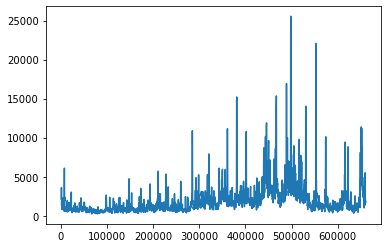

In [96]:
df_1min['rolling_quantile'].plot()

<AxesSubplot:>

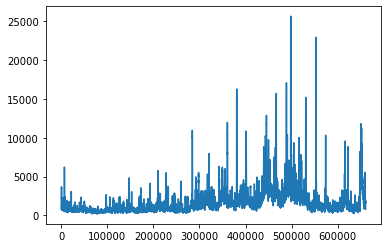

In [98]:
df_1min['rolling_mean_vol'].plot()